In [12]:
### Alex Zhang 512910

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy.stats import ttest_ind, f_oneway, levene
from numpy.random import seed
from numpy.random import normal

In [14]:
df = pd.read_csv('males_ht_wt_cntry.csv')
df

,Height,Weight,Country
0,64.0,144.0,Italy
1,68.0,150.0,Italy
2,66.0,147.0,Italy
3,71.0,170.0,Italy
4,65.0,163.0,Italy
...,...,...,...
235,68.0,152.0,Netherlands
236,73.0,179.0,Netherlands
237,69.0,176.0,Netherlands
238,70.0,164.0,Netherlands


In [15]:
country_data = df.groupby("Country")

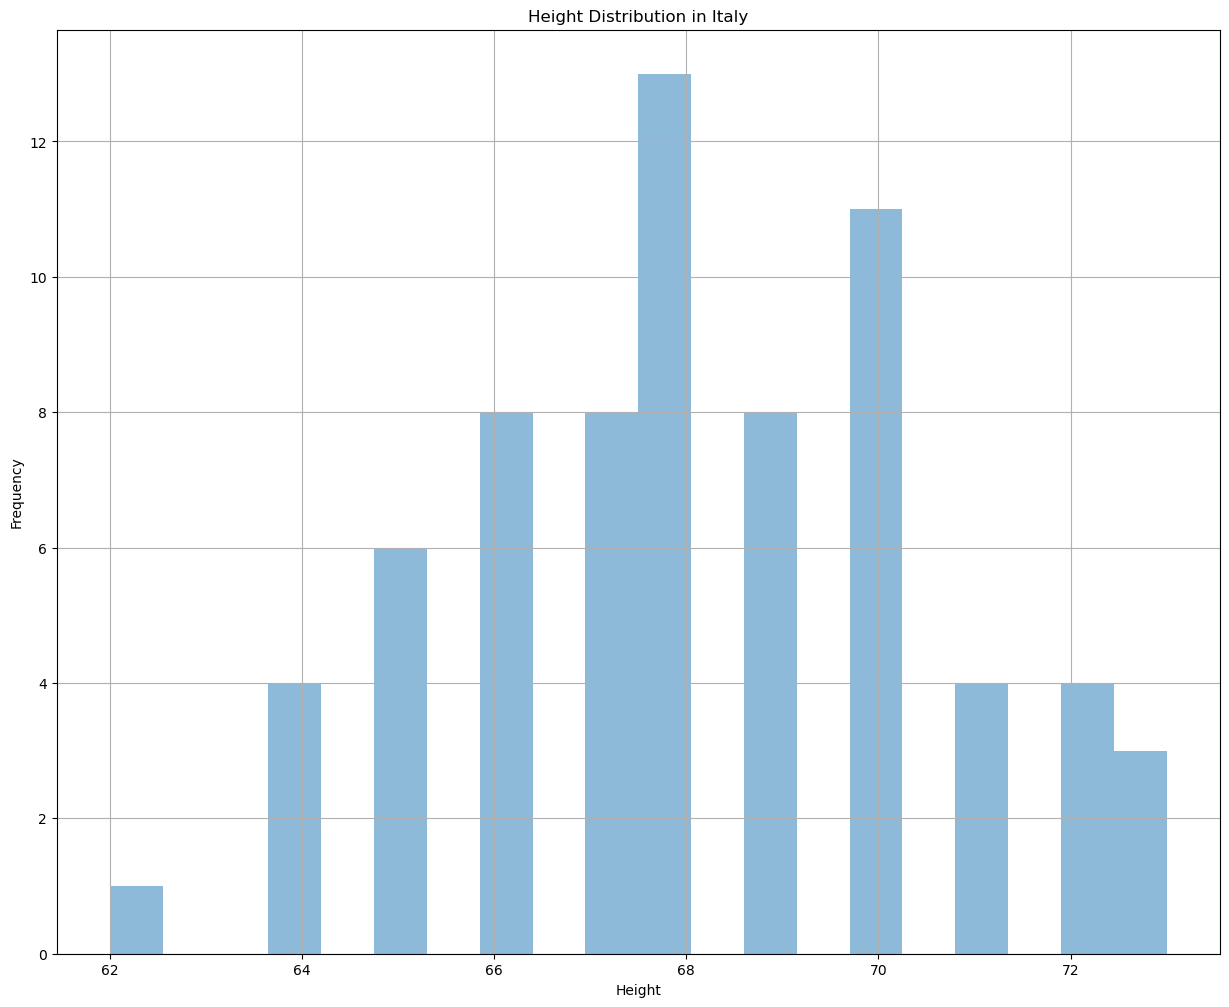

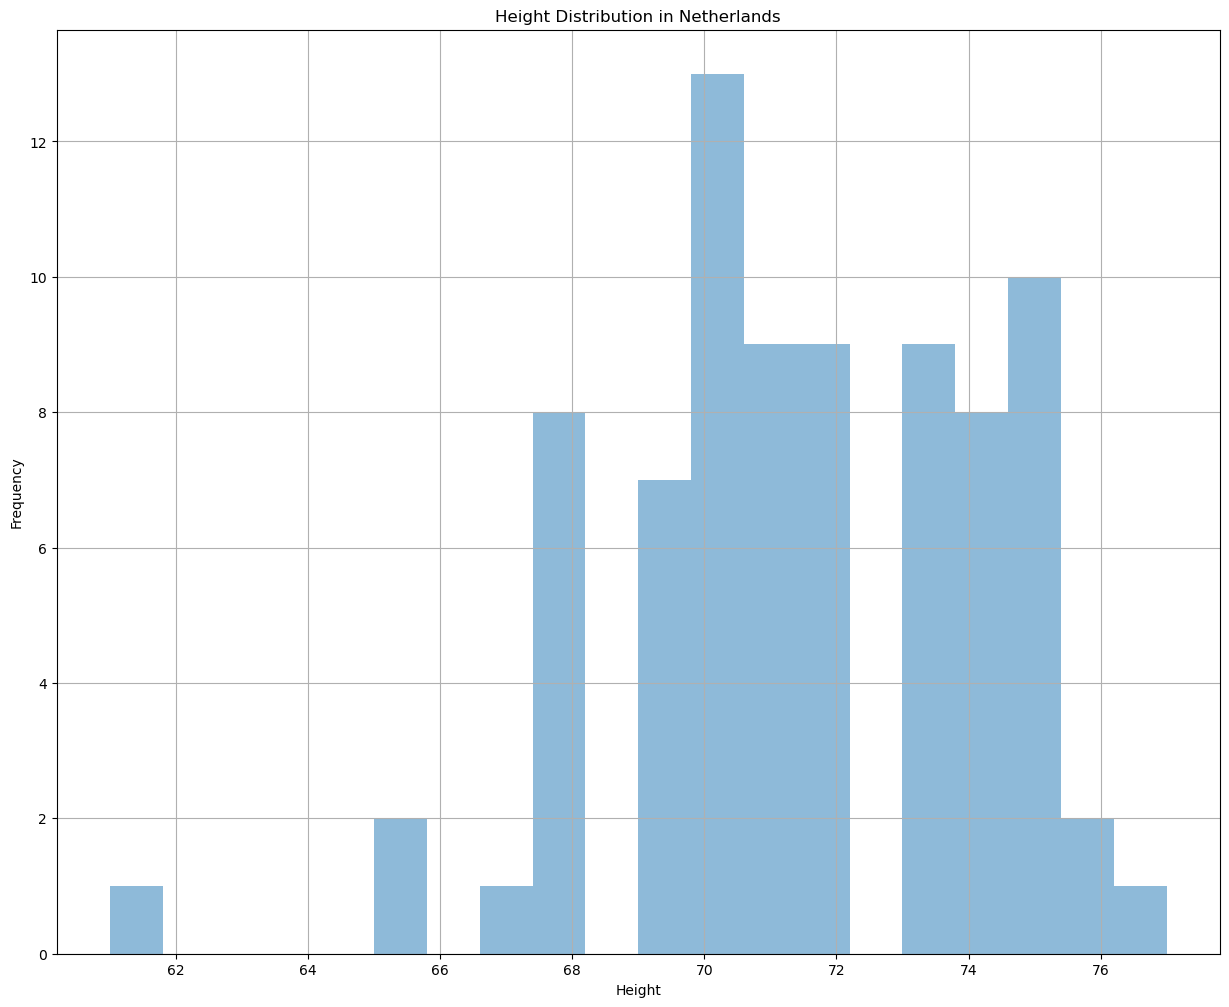

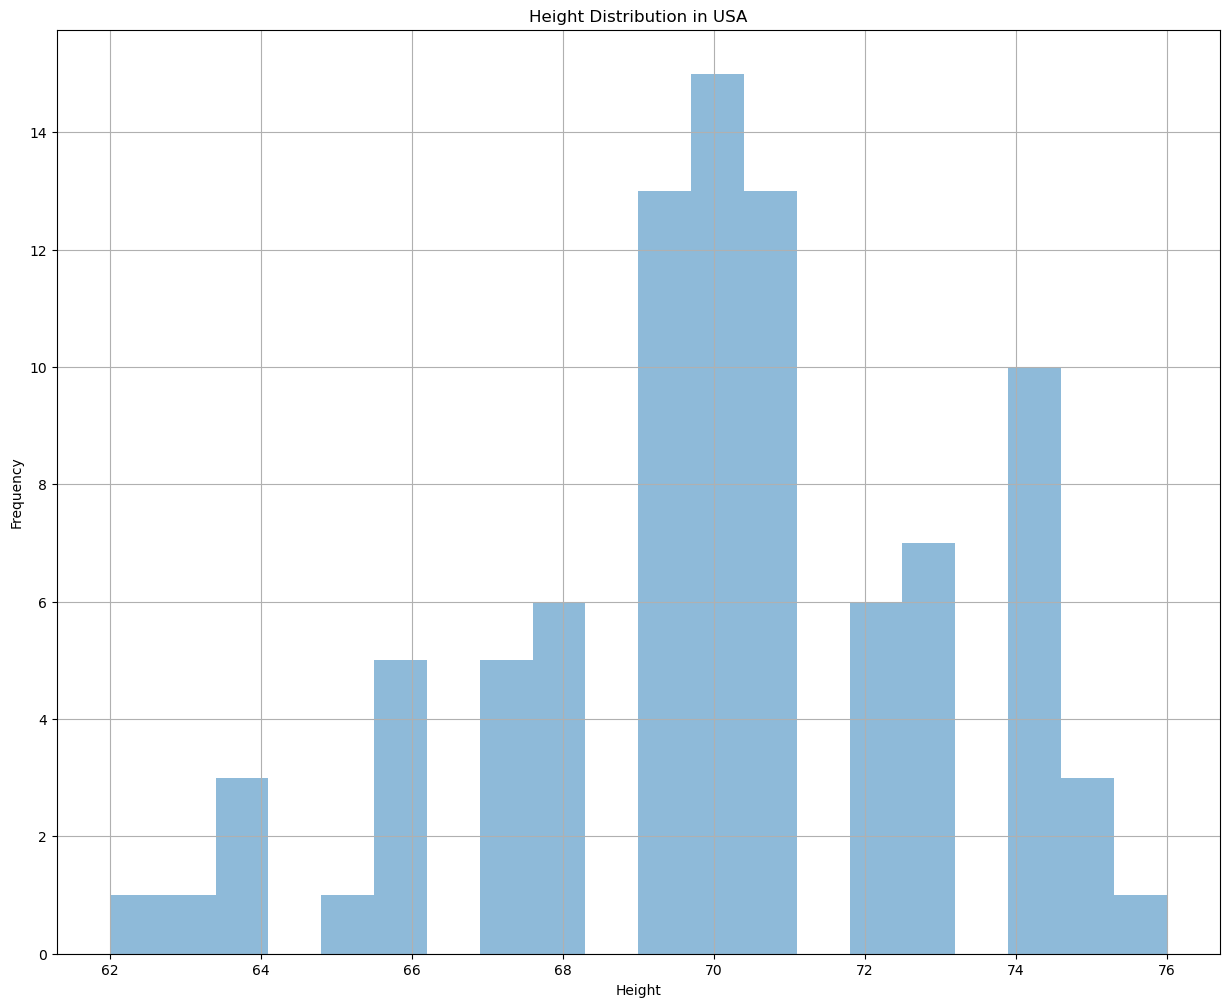

In [16]:
for country, group_data in country_data:
    plt.figure(figsize=(15, 12))
    plt.hist(group_data['Height'], bins=20, alpha=0.5)
    plt.title(f'Height Distribution in {country}')
    plt.xlabel('Height')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

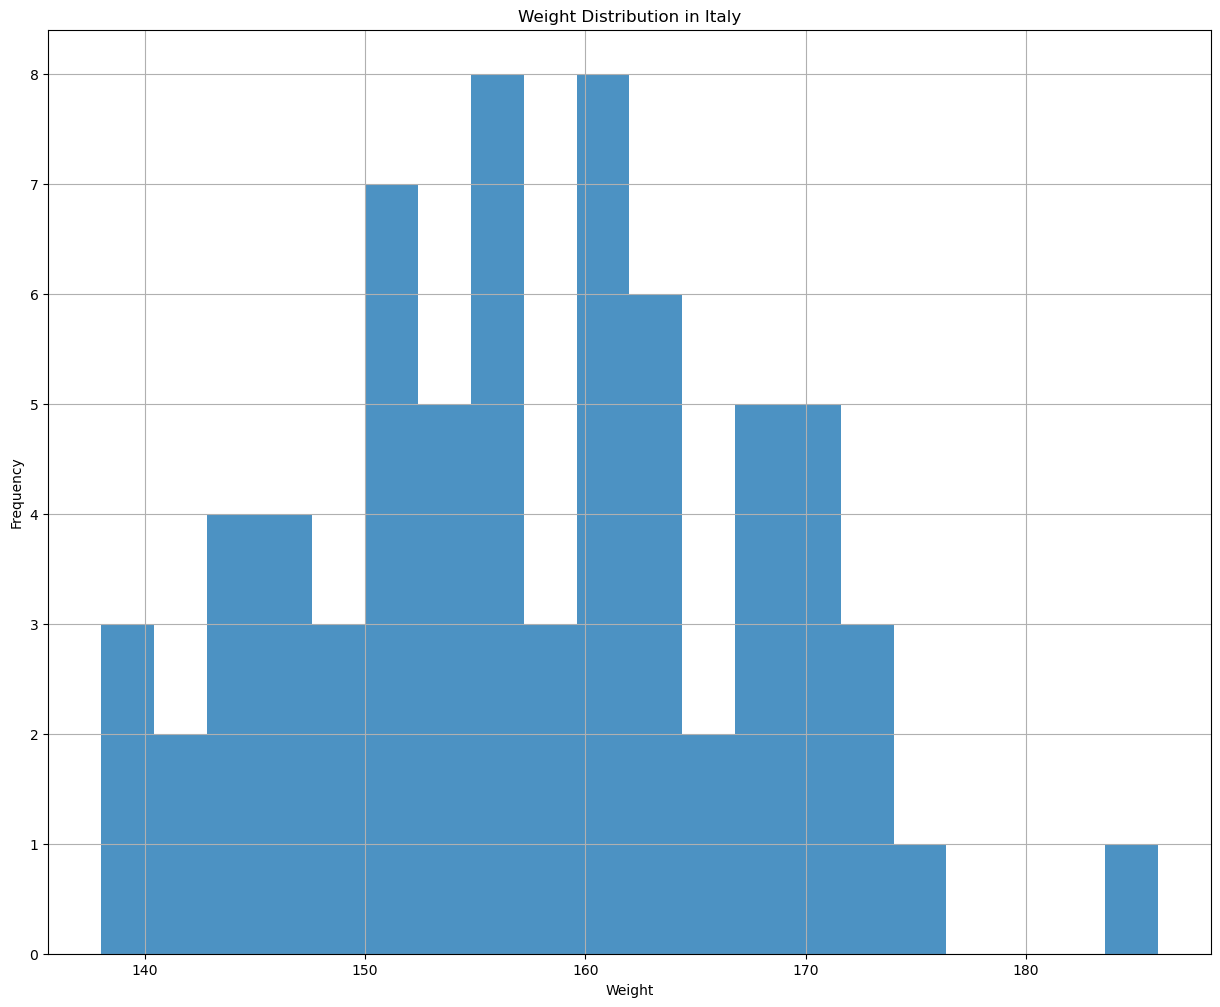

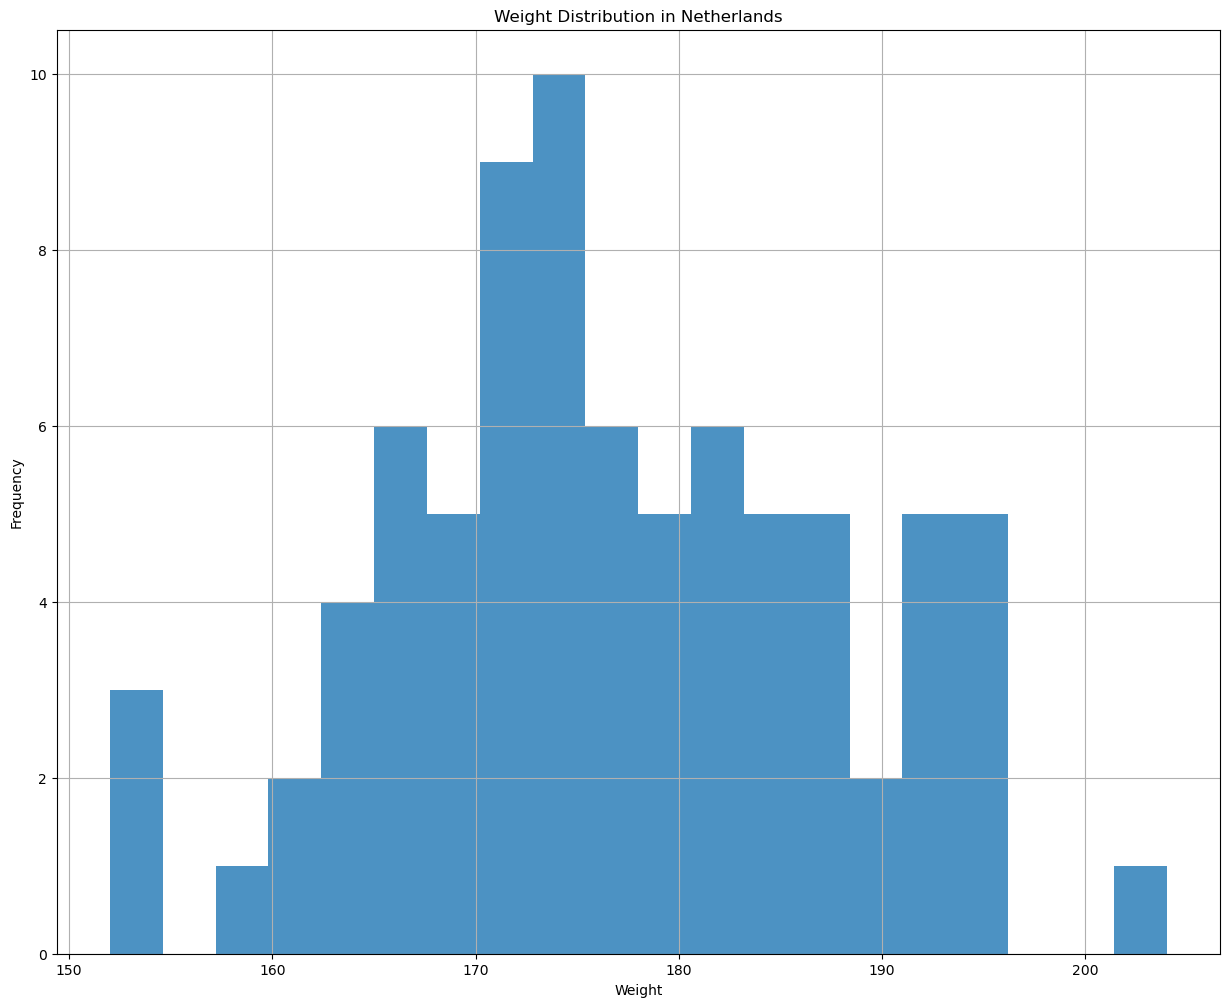

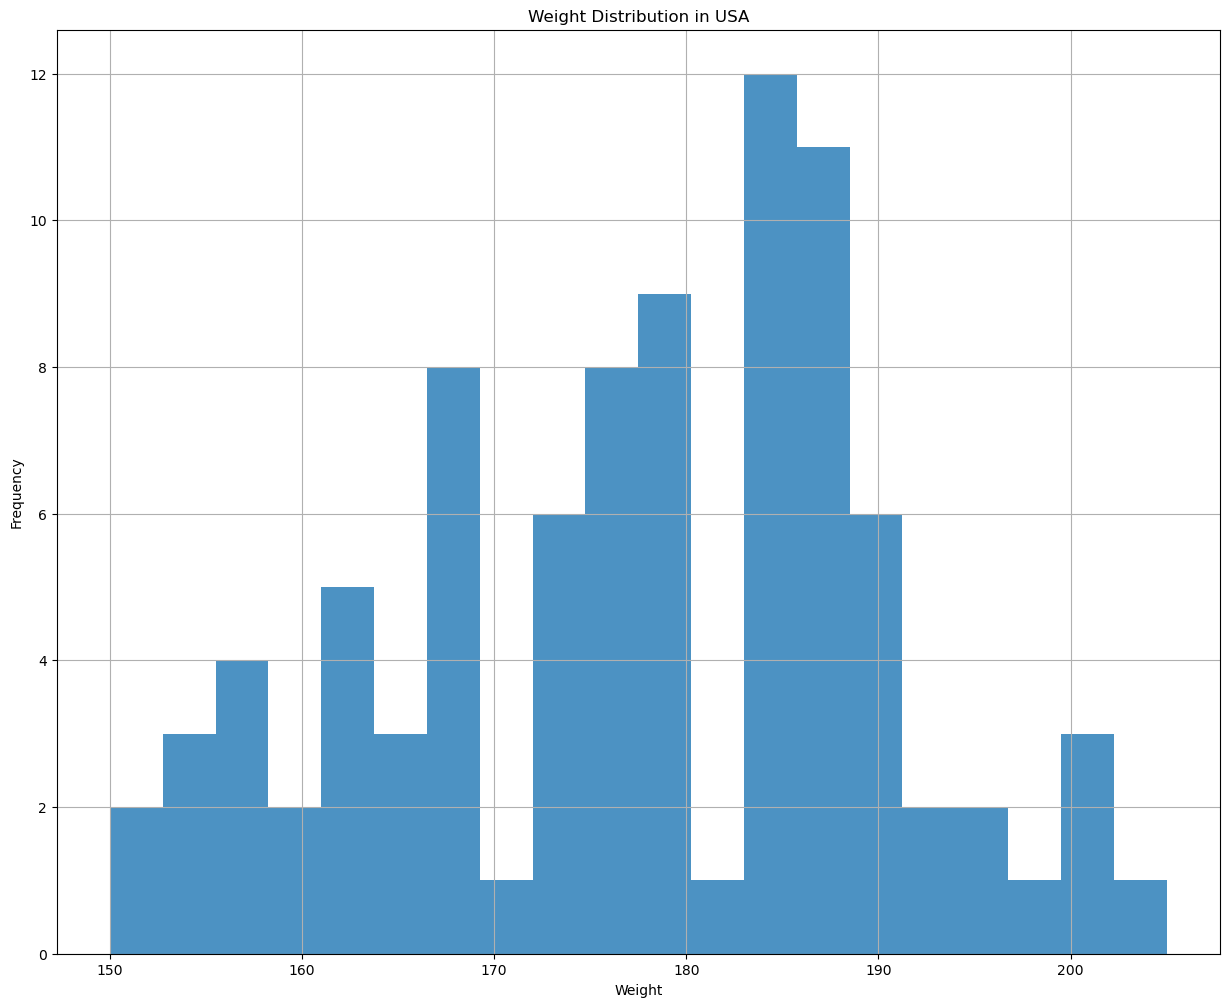

In [17]:

for country, group_data in country_data:
    plt.figure(figsize=(15, 12))
    plt.hist(group_data['Weight'], bins=20, alpha=0.8)
    plt.title(f'Weight Distribution in {country}')
    plt.xlabel('Weight')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [19]:
nationality_groups = [group_data['Weight'] for country, group_data in country_data]

levene_statistic, levene_p_value = levene(*nationality_groups)

alpha_levene = 0.05

print(f'Levene\'s Test Statistic: {levene_statistic:.2f}')
print(f'p-value for Levene\'s Test: {levene_p_value:.4f}')

if levene_p_value < alpha_levene:
    print("The p-value for Levene's test is less than the significance level.")
    print("There is evidence to suggest that the variances are not equal across groups.")
else:
    print("The p-value for Levene's test is greater than the significance level.")
    print("There is no strong evidence to suggest that the variances are different across groups.")


if levene_p_value >= alpha_levene:
    nationality_groups = [group_data['Weight'] for country,
                      group_data in country_data]

    f_statistic, p_value = f_oneway(*nationality_groups)

    alpha = 0.05


    print(f'F-statistic: {f_statistic:.2f}')
    print(f'p-value: {p_value:.4f}')

    if p_value < alpha:
        print("The p-value is less than the significance level, so reject H0.")
        print("There is evidence to suggest that the weights differ by nationality.")
    else:
        print("The p-value is greater than the significance level, so reject H1.")
        print("There is no strong evidence to suggest that the weights differ by nationality.")


Levene's Test Statistic: 2.66
p-value for Levene's Test: 0.0722
The p-value for Levene's test is greater than the significance level.
There is no strong evidence to suggest that the variances are different across groups.
F-statistic: 73.03
p-value: 0.0000
The p-value is less than the significance level, so reject H0.
There is evidence to suggest that the weights differ by nationality.


In [20]:
italian_weights = df[df['Country'] == 'Italy']['Weight']
dutch_weights = df[df['Country'] == 'Netherlands']['Weight']


t_statistic, p_value = ttest_ind(italian_weights, dutch_weights, equal_var=True)  # Assuming equal variances

alpha = 0.05


print(f'T-statistic: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')


if p_value < alpha:
    print("The p-value is less than the alpha value, so reject H0.")
    print("There is evidence to suggest that the weights of Italian males and Dutch males are significantly different.")
else:
    print("The p-value is greater than or equal to the alpha value, so  reject H1.")
    print("There is no strong evidence to suggest that the weights of Italian males and Dutch males are significantly different.")


T-statistic: -11.14
p-value: 0.0000
The p-value is less than the alpha value, so reject H0.
There is evidence to suggest that the weights of Italian males and Dutch males are significantly different.


In [21]:
american_weights = df[df['Country'] == 'USA']['Weight']
dutch_weights = df[df['Country'] == 'Netherlands']['Weight']

t_statistic, p_value = ttest_ind(american_weights, dutch_weights, equal_var=True)  # Assuming equal variances

alpha = 0.05

print(f'T-statistic: {t_statistic:.2f}')
print(f'p-value: {p_value:.4f}')

if p_value < alpha:
    print("The p-value is less than the significance level (alpha), so we reject the null hypothesis.")
    print("There is evidence to suggest that the weights of American males and Dutch males are significantly different.")
else:
    print("The p-value is greater than or equal to the significance level (alpha), so we fail to reject the null hypothesis.")
    print("There is no strong evidence to suggest that the weights of American males and Dutch males are significantly different.")

T-statistic: 0.39
p-value: 0.6955
The p-value is greater than or equal to the significance level (alpha), so we fail to reject the null hypothesis.
There is no strong evidence to suggest that the weights of American males and Dutch males are significantly different.


In [22]:
alpha = 0.05
n_tests = 3

prob_at_least_one_false_positive = 1 - (1 - alpha) ** n_tests
print(f"The probability of at least one false positive is {prob_at_least_one_false_positive}")

The probability of at least one false positive is 0.1426250000000001


In [23]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [24]:
tukey = pairwise_tukeyhsd(endog=df['Weight'], 
                          groups=df['Country'],  
                          alpha=0.05) 

tukey_results = tukey.summary()
print(tukey_results)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
      Italy Netherlands  19.2839    0.0 14.8586 23.7093   True
      Italy         USA  20.0048    0.0 15.6957 24.3138   True
Netherlands         USA   0.7208 0.9119  -3.434  4.8757  False
--------------------------------------------------------------


In [27]:
df['BMI'] = (df['Weight'] * 703) / (df['Height'] ** 2)
df

,Height,Weight,Country,BMI
0,64.0,144.0,Italy,24.714844
1,68.0,150.0,Italy,22.804931
2,66.0,147.0,Italy,23.723829
3,71.0,170.0,Italy,23.707598
4,65.0,163.0,Italy,27.121657
...,...,...,...,...
235,68.0,152.0,Netherlands,23.108997
236,73.0,179.0,Netherlands,23.613624
237,69.0,176.0,Netherlands,25.987818
238,70.0,164.0,Netherlands,23.528980


In [28]:
df['Overweight'] = (df['BMI'] >= 25).astype(int)
df

,Height,Weight,Country,BMI,Overweight
0,64.0,144.0,Italy,24.714844,0
1,68.0,150.0,Italy,22.804931,0
2,66.0,147.0,Italy,23.723829,0
3,71.0,170.0,Italy,23.707598,0
4,65.0,163.0,Italy,27.121657,1
...,...,...,...,...,...
235,68.0,152.0,Netherlands,23.108997,0
236,73.0,179.0,Netherlands,23.613624,0
237,69.0,176.0,Netherlands,25.987818,1
238,70.0,164.0,Netherlands,23.528980,0


In [29]:
ctable = pd.crosstab(df['Country'], df['Overweight'])
ctable

Overweight,0,1
Country,,
Italy,54,16
Netherlands,48,32
USA,38,52


In [36]:
from scipy.stats import chi2_contingency

In [37]:
chi2, p, dof, expected = chi2_contingency(ctable)

In [42]:
if p < alpha:
    print("The Chi-Square test suggests that there is a statistically significant association between nationality and being overweight.")
else:
    print("The Chi-Square test suggests that there is no statistically significant association between nationality and being overweight.")

The Chi-Square test suggests that there is a statistically significant association between nationality and being overweight.


In [43]:
import statsmodels.api as sm

In [44]:
x = df['Height']  
y = df['Weight']  

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           3.82e-25
Time:                        02:22:16   Log-Likelihood:                -927.86
No. Observations:                 240   AIC:                             1860.
Df Residuals:                     238   BIC:                             1867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.2547     17.138     -1.649      0.1

In [45]:
import numpy as np

In [46]:
x2 = df['Height']
y2 = df['Weight']

x2 = np.column_stack((np.ones(x2.shape[0]), x2))
beta = np.linalg.lstsq(x2, y2, rcond=None)[0]

print("Linear Algebra Beta Values:")
print(f"Intercept (beta_0): {beta[0]}")
print(f"Height coefficient (beta_1): {beta[1]}")

Linear Algebra Beta Values:
Intercept (beta_0): -28.254701729405884
Height coefficient (beta_1): 2.8536531102607454
